In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
import pathlib

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
dataset_path = "C:/Users/chund/Desktop/Telegram Desktop/archive/tea sickness dataset"
dataset_dir = pathlib.Path(dataset_path)

In [4]:
class_names = []
for x in os.walk(dataset_path):
    sub_dir = x[0]
    sub_dir_list = str(sub_dir).split('/')
    if len(sub_dir_list) > 4:
        x_class = (sub_dir_list[-1])
        class_names.append(x_class)

print(class_names)

['tea sickness dataset', 'tea sickness dataset\\algal leaf', 'tea sickness dataset\\Anthracnose', 'tea sickness dataset\\bird eye spot', 'tea sickness dataset\\brown blight', 'tea sickness dataset\\gray light', 'tea sickness dataset\\healthy', 'tea sickness dataset\\red leaf spot', 'tea sickness dataset\\white spot']


In [5]:
train_batch = 128
val_batch = 128
img_height = 224
img_width = 224
IMG_SIZE = (img_height, img_width)
val_split = 0.2

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(dataset_dir,
                                                       validation_split=val_split,
                                                       subset="training",
                                                       seed=123,
                                                       image_size=(img_height, img_width),
                                                       batch_size=train_batch
                                                      )

Found 885 files belonging to 8 classes.
Using 708 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(dataset_dir,                                                            
                                                     validation_split=val_split,                                                            
                                                     subset="validation",                                                     
                                                     seed=123,                                                     
                                                     image_size=(img_height, img_width),                                                     
                                                     batch_size=val_batch                                                           
                                                    )

Found 885 files belonging to 8 classes.
Using 177 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

num_classes=len(class_names)

['Anthracnose', 'algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']


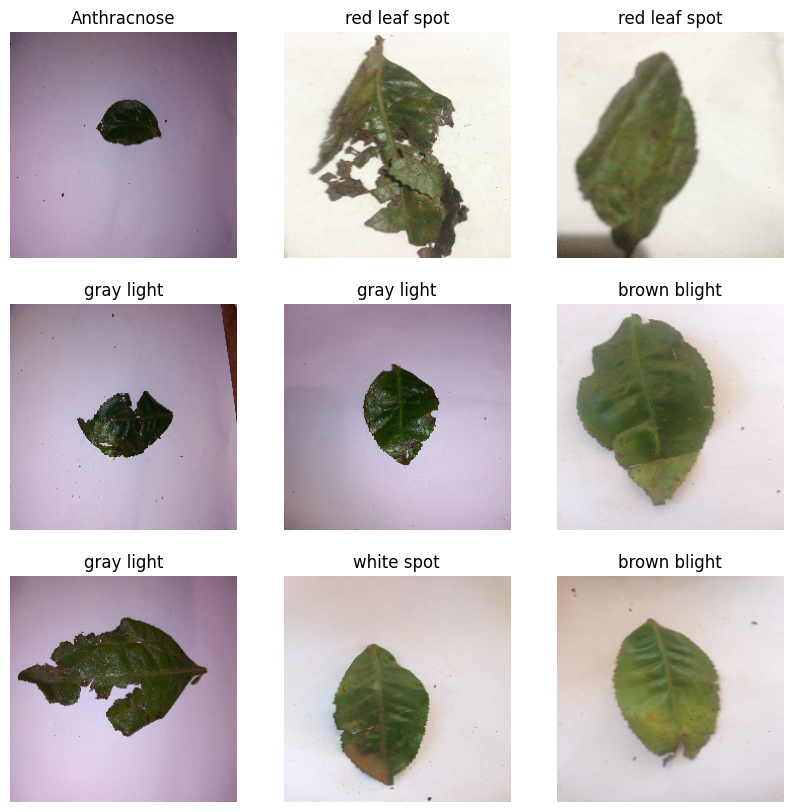

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
img_height, img_width

(224, 224)

In [12]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomFlip("vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

In [13]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(num_classes)
])

In [14]:
base_learning_rate = 0.0005
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                  

In [19]:
epochs=300
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    verbose=0
)


Predictions:
 [7 7 0 7 0 3 4 7 1 0 4 7 3 6 0 7 0 7 3 4 7 0 6 7 7 4 7 7 4 4 3 5 7 0 6 4 3
 7 4 4 7 7 6 0 0 4 6 4 7 1 6 4 3 4 4 6 7 7 5 0 6 0 0 4 3 6 0 6 6 5 7 7 7 4
 4 7 7 7 4 0 0 6 6 0 0 1 1 4 7 0 4 0 5 7 4 6 4 7 7 7 4 6 4 3 0 1 7 7 5 6 5
 5 7 6 7 3 2 3 7 0 3 0 7 0 4 7 7 0]
Labels:
 [3 7 2 7 0 7 2 1 1 4 0 7 7 6 0 1 2 3 3 4 3 0 6 3 7 4 1 1 0 4 7 5 3 0 6 4 3
 7 4 4 7 7 6 2 0 4 6 3 1 3 6 2 7 4 4 3 7 1 5 0 6 4 0 4 1 6 4 6 3 5 3 7 3 2
 2 7 1 3 2 0 4 6 6 0 0 1 1 4 7 0 0 4 5 3 2 6 4 7 7 3 2 6 0 7 4 1 3 3 5 6 5
 5 7 6 1 3 2 3 7 0 3 4 3 0 4 7 3 0]

              precision    recall  f1-score   support

           0       0.58      0.78      0.67        18
           1       0.80      0.31      0.44        13
           2       1.00      0.09      0.17        11
           3       0.45      0.22      0.29        23
           4       0.52      0.65      0.58        20
           5       1.00      1.00      1.00         7
           6       0.88      1.00      0.94        15
           7       0.

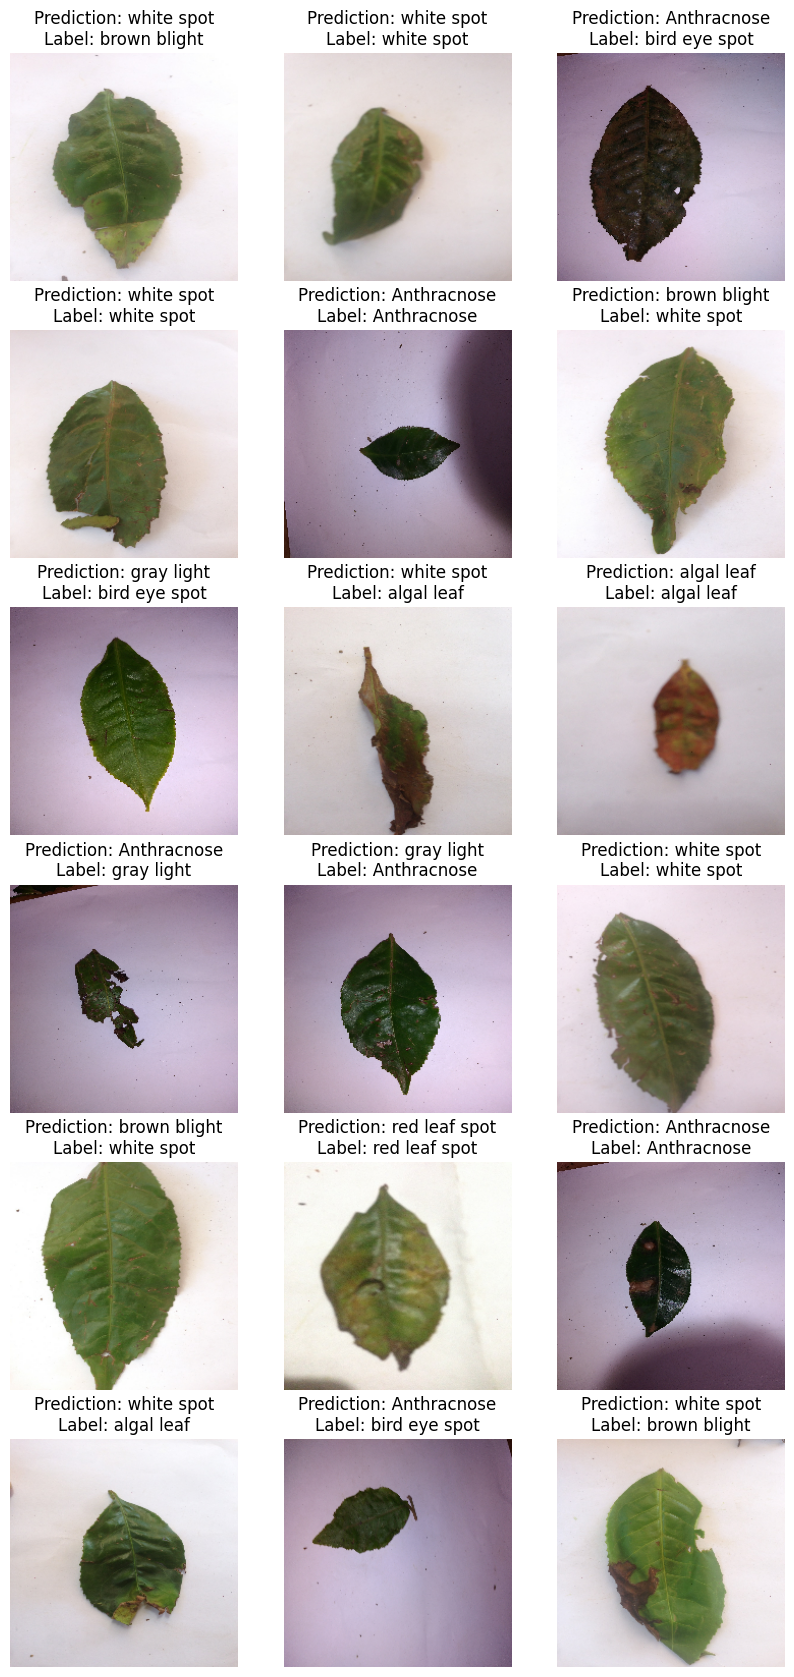

In [20]:
image_batch, label_batch = val_ds.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

class_predictions = []
for i in predictions:
    class_prediction = np.argmax(i)
    class_predictions.append(class_prediction)

class_predictions = np.array(class_predictions)
print('Predictions:\n', class_predictions)
print('Labels:\n', label_batch)
print()
print(classification_report(label_batch, class_predictions))

plt.figure(figsize=(10, 21))
for i in range(18):
    ax = plt.subplot(6, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title("Prediction: "+class_names[class_predictions[i]]+"\nLabel: "+class_names[label_batch[i]])
    plt.axis("off")

In [21]:
model.save('leafkou.h5')

In [22]:
from keras.models import load_model
model = load_model('./leaf.h5')

In [23]:
class_names = ['Anthracnose', 'algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']

In [24]:
import telebot
import requests
from PIL import Image
import io
import matplotlib.image as mpimg

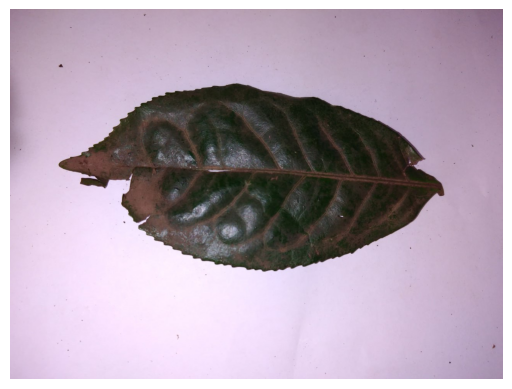

1/1 [==============================] - 0s 24ms/step
0


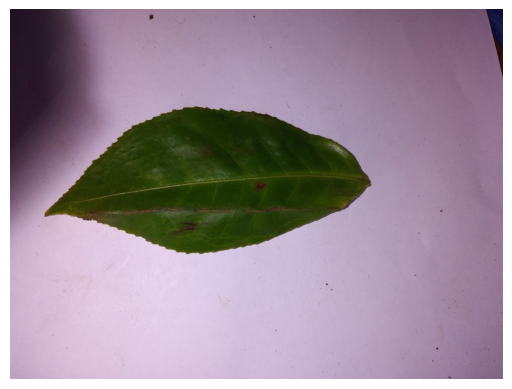

1/1 [==============================] - 0s 26ms/step
2


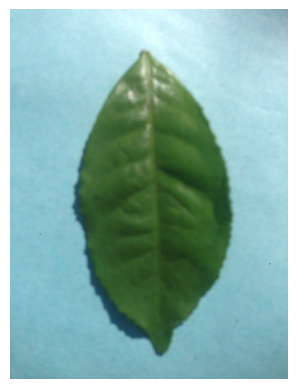

1/1 [==============================] - 0s 25ms/step
5


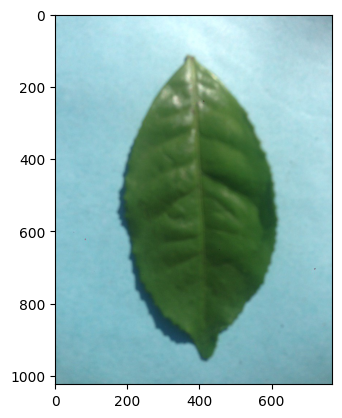

In [28]:
TelegramBOT_TOKEN = '6408135757:AAFbd4BDS-BgOXJXYcas9RSEUyN0F4HsFWo'
bot = telebot.TeleBot(TelegramBOT_TOKEN)

# Define a command handler for the '/start' command
@bot.message_handler(commands=['start'])
def send_welcome(message):
    bot.reply_to(message, "Welcome! Send me an image, and I'll extract the text from it.")

# Define a message handler for receiving images
@bot.message_handler(content_types=['photo'])
def handle_image(message):
    file_id = message.photo[-1].file_id
    file_info = bot.get_file(file_id)
    file_path = file_info.file_path

    # Download the image
    downloaded_file = bot.download_file(file_path)
    image_path = 'C:/Users/chund/Desktop/Telegram Desktop/archive/tea sickness dataset/image.jpg'
    with open(image_path, 'wb') as f:
        f.write(downloaded_file)


    # Load the image
    eye_img = mpimg.imread(image_path)

    # Display the image
    plt.imshow(eye_img)
    plt.axis('off')  # Optional: Hide the axis labels and ticks
    plt.show()
    path = 'C:/Users/chund/Desktop/Telegram Desktop/archive/tea sickness dataset/image.jpg'
    img = Image.open(path)
    plt.imshow(np.array(img))
    img = np.array(img.resize((224, 224)))
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    pred = np.argmax(pred)
    print(pred)
#     print(f"predicted class : {class_names[int(pred)]}")

    response = class_names[pred]

    bot.reply_to(message, response)

#     except Exception as e:
#     bot.reply_to(message, "Oops! Something went wrong. Please try again.")

# Polling loop to keep the bot running
bot.polling()


In [27]:
loss, accuracy = model.evaluate(train_ds)
print(f'Validation accuracy: {accuracy * 100:.6f}%')

6/6 [==============================] - 2s 361ms/step - loss: 1.3135 - accuracy: 0.6257
Validation accuracy: 62.570620%
